In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

$$ \int \int \int e^{\sqrt{x^{2}+y^{2}+z^{2}}}  dx dy dz = 4\pi(e-2) $$

$$ \{x^{2}+y^{2}+z^{2} \le 1 \} $$

In [3]:
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
        r = R* u**(1./3.)
        
        X = np.append(X, r*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, r*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, r*np.cos(theta))
    
    return X, Y, Z
     
Radio = 1.0    
Npoints = 10000
data_sphere = CreateSphere(Npoints, Radio)
data_sphere = np.array(data_sphere)

In [4]:
data = np.random.rand(300,3)

<IPython.core.display.Javascript object>


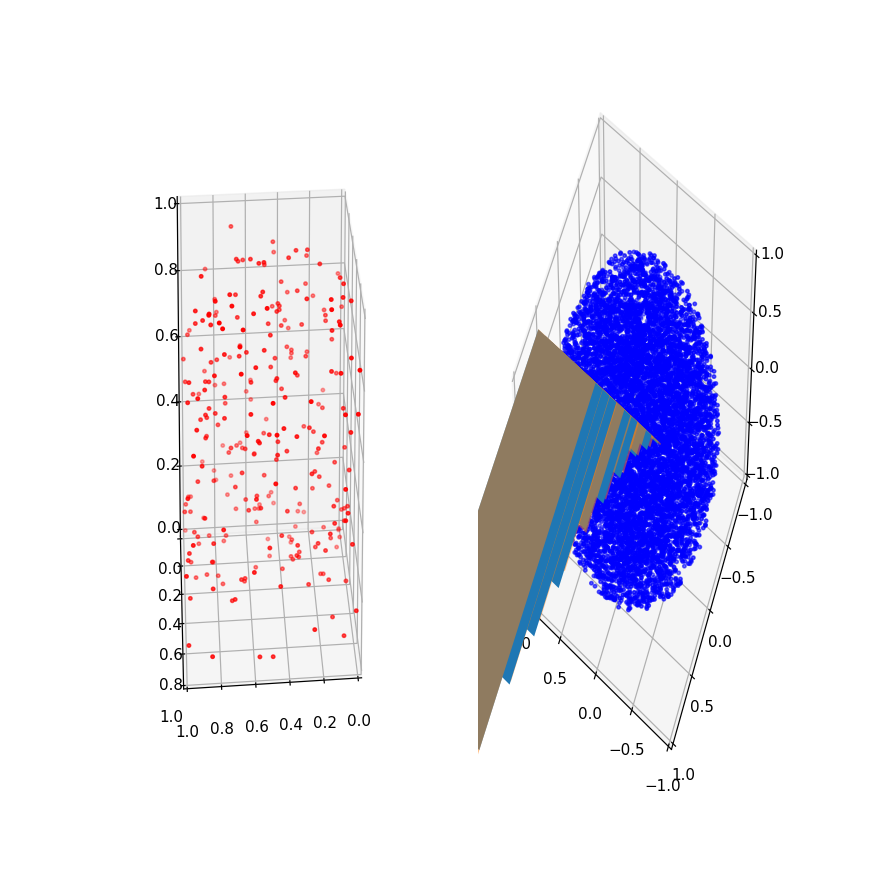

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax1 = fig.add_subplot(1,2,2, projection = '3d')


#configurar límites de los ejes
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax1.set_xlim3d(-Radio, Radio)
ax1.set_ylim3d(-Radio, Radio)
ax1.set_zlim3d(-Radio, Radio)

ax.view_init(10, 60)
ax1.view_init(10, 60)


ax.scatter(data[:,0], data[:,1], data[:,2], color='r', marker='.')
ax1.scatter(data_sphere[0], data_sphere[1], data_sphere[2], color='b', marker='.')

#plt.savefig('3dPoints.pdf')
plt.show()

# Integracion con opcion cartesiana.

In [6]:
def FunctionI(x,y,z):
    return np.exp( np.sqrt(x**2+y**2+z**2) )

In [7]:
def CalculateIntegral(data, Npoints, R):
    
    integral = 0.
    
    for i in range(Npoints):
        
        integral += FunctionI(data[0][i],data[1][i],data[2][i])
    
    Norma = (4.*np.pi)*(R**3)/3.
    
    integral *= Norma/Npoints
    
    return integral

In [8]:
integral = CalculateIntegral(data_sphere, Npoints, 1.0)
print(integral)

9.03726779343528


# Integracion con opcion esferica

In [9]:
def FunctionE(r,theta):
    #return np.exp(r)*r**2 * np.pi * np.sin(theta*np.pi)
    return np.exp(r)

    # Esta definicion es para que los limites de la integral seas [0,1]

In [10]:
def GetIntegral(Npoints,R):
    
    Sample = []
    
    for i in range(Npoints):
    
        u = np.random.rand()
        r = R*u**(1./3.)
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        Sample.append(FunctionE(r,theta))
       
    
    integral = np.average(Sample)
    
    Norma = (4.*np.pi)*(R**3)/3. 
    
    integral *= Norma
    
    return integral

In [11]:
print(GetIntegral(10000,1))

9.0313804607536


In [12]:
# Vamos a hacer varios intentos
NPoints = 100000
Int_v = []
Int_v = np.array(Int_v)

for i in tqdm(range(100)):
    Int_v = np.append(Int_v, GetIntegral(Npoints,1))

print(np.average(Int_v))

100%|██████████| 100/100 [00:03<00:00, 32.77it/s]

9.02613115304757


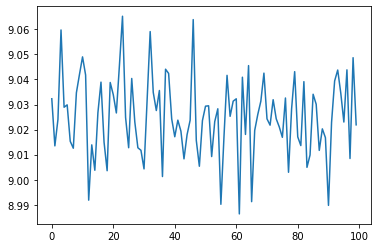

In [177]:
plt.plot(Int_v)

In [13]:
# usando funcion acumulada para r**3 = u
def GetR(u):
    return (u)**(1./3.)

In [14]:
l = []
for i in range(10000):
    l.append(GetR(np.random.uniform(0,1)))

In [15]:
def GetArray(N=int(1e5)):
    r = []
    
    for i in range(N):
        u = np.random.rand()
        r.append(u**(1./3.))
    
    return r
    
Arrayr = GetArray()

<IPython.core.display.Javascript object>


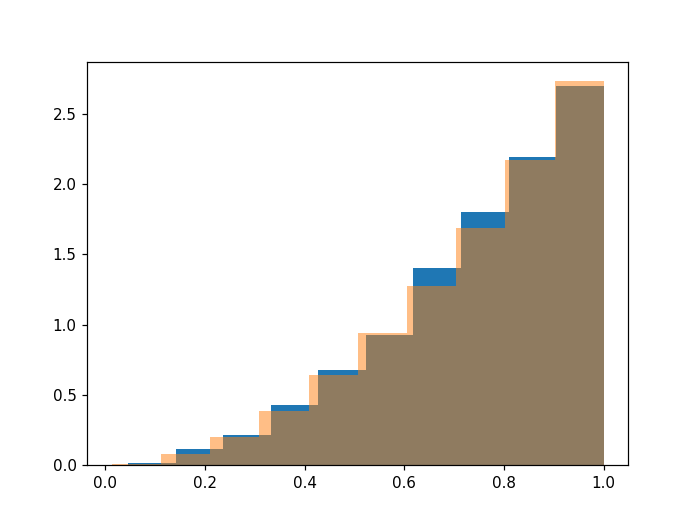

(array([0.01347882, 0.08269714, 0.20025679, 0.38733879, 0.63988936,
        0.94149068, 1.27592763, 1.6907308 , 2.17221866, 2.73042433]),
 array([0.01326401, 0.11193732, 0.21061063, 0.30928394, 0.40795724,
        0.50663055, 0.60530386, 0.70397717, 0.80265047, 0.90132378,
        0.99999709]),
 <a list of 10 Patch objects>)

In [17]:
plt.hist(l, density = True)
plt.hist(Arrayr, density = True, alpha=0.5)